In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np

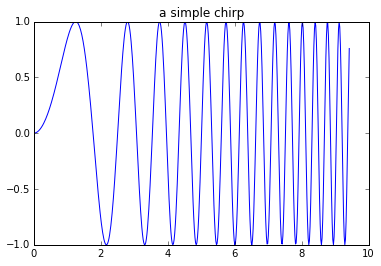

In [5]:
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('a simple chirp')

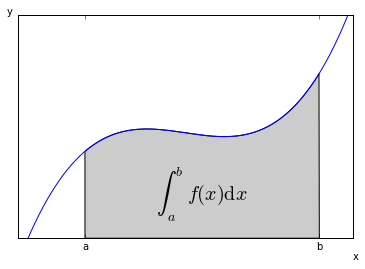

In [6]:
# implement the example graphs/integral from pyx
from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()

In [7]:
import sys
import time
from IPython.display import display, clear_output
for i in range(10):
    time.sleep(0.25)
    clear_output()
    print(i)
    sys.stdout.flush()

9


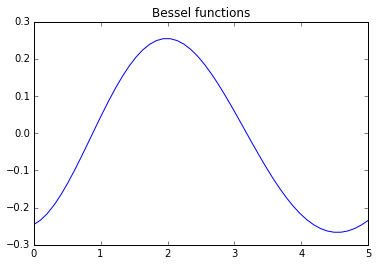

In [8]:
from scipy.special import jn
x = np.linspace(0, 5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")

ax.plot(x, jn(x, 10))
display(f)

# for n in range(1, 10):
#     time.sleep(1)
#     clear_output()
#     display(f)
    
plt.close()

In [9]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [10]:
%timeit np.linalg.eigvals(np.random.rand(100,100))

100 loops, best of 3: 4.68 ms per loop


In [11]:
a = np.random.rand(100, 100)
np.linalg.eigvals(a)

array([  4.96758219e+01+0.j        ,  -1.46319809e+00+2.41159534j,
        -1.46319809e+00-2.41159534j,  -4.29729899e-01+2.76474979j,
        -4.29729899e-01-2.76474979j,   5.21529890e-01+2.74244362j,
         5.21529890e-01-2.74244362j,  -1.72436622e+00+1.94549437j,
        -1.72436622e+00-1.94549437j,   1.76662822e+00+2.08942242j,
         1.76662822e+00-2.08942242j,   8.89700472e-01+2.54720254j,
         8.89700472e-01-2.54720254j,  -2.52192197e+00+0.j        ,
         1.43288394e+00+2.22786748j,   1.43288394e+00-2.22786748j,
         2.73209893e+00+0.j        ,   2.38148547e+00+1.10197866j,
         2.38148547e+00-1.10197866j,   2.65352751e+00+0.38169684j,
         2.65352751e+00-0.38169684j,  -3.23657099e-01+2.47360316j,
        -3.23657099e-01-2.47360316j,  -2.39776340e+00+0.35949227j,
        -2.39776340e+00-0.35949227j,   3.57164052e-01+2.48666418j,
         3.57164052e-01-2.48666418j,  -2.06381057e+00+1.1810984j ,
        -2.06381057e+00-1.1810984j ,  -1.88949203e+00+1.311922

In [12]:
from IPython.core.pylabtools import print_figure
from IPython.display import Image, SVG, Math

class Gaussian(object):
    def __init__(self, mean = 0, std=1, size = 1000):
        self.data = np.random.normal(mean, std, size)
        self.mean = mean
        self.std = std
        self.size = size
        self._png_data = None
        self._svg_data = None
        
    def _figure_data(self, format):
        fig, ax = plt.subplots()
        ax.plot(self.data, 'o')
        ax.set_title(self._repr_latex_())
        data = print_figure(fig, format)
        plt.close()
        return data
    
    def _repr_png_(self):
        if self._png_data is None:
            self._png_data = self._figure_data('png')
        return self._png_data
    
    def _repr_svg_(self):
        if self._svg_data is None:
            self._svg_data = self._figure_data('svg')
        return self._svg_data
    
    def _repr_latex_(self):
        return r'$\mathcal{N}(\mu=%.2g, \sigma=%.2g), \ N=%d$' % (self.mean,
                                                                 self.std,
                                                                 self.size)
    @property
    def hist(self):
        fig, ax = plt.subplots()
        ax.hist(self.data, bins=100)
        ax.set_title(self._repr_latex_)
        data = print_figure(fig, 'png')
        plt.close(fig)
        return Image(data, embed=True)
    @property
    def png(self):
        return Image(self._repr_png_, embed=True)
    
    @property
    def svg(self):
        return SVG(self._repr_svg_)
    
    @property
    def latex(self):
        return Math(self._repr_latex_)

In [13]:
x = Gaussian()
x.png

/usr/local/lib/python2.7/site-packages/IPython/core/formatters.py:337: FormatterWarning: image/png formatter returned invalid type <type 'instancemethod'> (expected (<type 'str'>, <type 'unicode'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

In [14]:
from IPython.display import display
display(x.png)

<IPython.core.display.Image object>

In [15]:
from IPython.core.pylabtools import print_figure
from IPython.display import Image, SVG, Math

class Gaussian(object):
    """A simple object holding data sampled from a Gaussian distribution.
    """
    def __init__(self, mean=0, std=1, size=1000):
        self.data = np.random.normal(mean, std, size)
        self.mean = mean
        self.std = std
        self.size = size
        # For caching plots that may be expensive to compute
        self._png_data = None
        self._svg_data = None
        
    def _figure_data(self, format):
        fig, ax = plt.subplots()
        ax.plot(self.data, 'o')
        ax.set_title(self._repr_latex_())
        data = print_figure(fig, format)
        # We MUST close the figure, otherwise IPython's display machinery
        # will pick it up and send it as output, resulting in a double display
        plt.close(fig)
        return data
    
    # Here we define the special repr methods that provide the IPython display protocol
    # Note that for the two figures, we cache the figure data once computed.
    
    def _repr_png_(self):
        if self._png_data is None:
            self._png_data = self._figure_data('png')
        return self._png_data


    def _repr_svg_(self):
        if self._svg_data is None:
            self._svg_data = self._figure_data('svg')#.decode('utf-8').encode('utf-8')
        return self._svg_data
    
    def _repr_latex_(self):
        return r'$\mathcal{N}(\mu=%.2g, \sigma=%.2g),\ N=%d$' % (self.mean,
                                                                 self.std, self.size)
    
    # We expose as properties some of the above reprs, so that the user can see them
    # directly (since otherwise the client dictates which one it shows by default)
    @property
    def png(self):
        return Image(self._repr_png_(), embed=True)
    
    @property
    def svg(self):
        return SVG(self._repr_svg_())
        
    @property
    def latex(self):
        return Math(self._repr_latex_())
    
    # An example of using a property to display rich information, in this case
    # the histogram of the distribution.  We've hardcoded the format to be png
    # in this case, but in production code it would be trivial to make it an option
    @property
    def hist(self):
        fig, ax = plt.subplots()
        ax.hist(self.data, bins=100)
        ax.set_title(self._repr_latex_())
        data = print_figure(fig, 'png')
        plt.close(fig)
        return Image(data, embed=True)

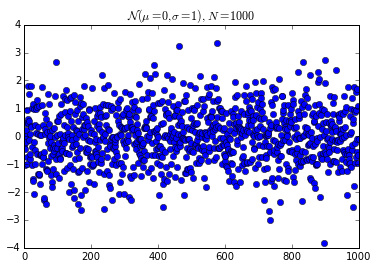

In [16]:
x = Gaussian()
x.png

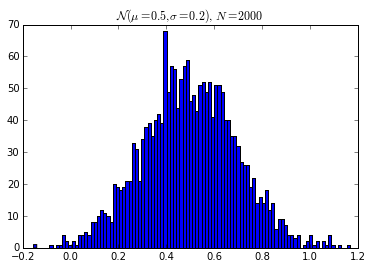

In [17]:
x2 = Gaussian(0.5, 0.2, 2000)
x2
x2.png
x2.hist

In [18]:
print("hi, stdout")

hi, stdout


In [19]:
from __future__ import print_function
print('hi, stderr', file=sys.stderr)

hi, stderr


### New paragraph 
This is *rich* **text** with [links](http://ipython.org),
equations:

$\hat{f}(\xi) = \int_{-\infty}^{+\infty} f(x)\,
                 \mathrm{e}^{-i \xi x}$
                 
$$\hat{f}(\xi) = \int_{-\infty}^{+\infty} f(x)\,
                 \mathrm{e}^{-i \xi x}$$

code with syntax highlighting: 
```python
print("Hello world!")
``` 

![This is an image](http://ipython.org/_static/IPy_header.png)


>```LaTeX equations are rendered with the MathJax library. We can enter inline equations with $...$ and displayed equations with $$...$$. We can also use environments such as equation, eqnarray, or align. These features are very useful to scientific users.```


In [36]:
from IPython.display import HTML, SVG, YouTubeVideo
points = np.array([[1, 2, 3],
                   [4, 6, 9],
                   [9, 1, 1],
                  ])
HTML('''
         <table style="border: 2px solid black;">
         ''' + 
         ''.join(['<tr>' + 
                  ''.join(['<td>  {val}  </td>'.format(
                                 val=points[row][col]
                                 ) for col in range(3)]) +
                  '</tr>' for row in range(3)]) +
         '''
         </table>
         ''')


1,2,3
4,6,9
9,1,1


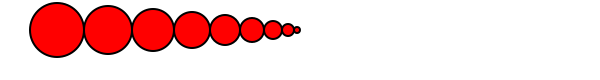

In [37]:
SVG('''<svg width="600" height="80">''' + 
         ''.join(['''<circle cx="{x}" cy="{y}" r="{r}"
                             fill="red"
                             stroke-width="2"
                             stroke="black">
                     </circle>'''.format(x=(30+3*i)*(10-i),
                                         y=30,
                                         r=3.*float(i)
                                         ) for i in range(10)]) + 
         '''</svg>''')

In [ ]:
# plot use pandas and matplotlib

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## differences between python2 and python3
### Here is a partial list of differences:
* Instead of a statement, print is a function (parentheses are compulsory).
* Division of integers yields floating-point numbers and not integers.
* Several built-in functions return iterators or views instead of lists. For example, range behaves in Python 3 like xrange in Python 2, and the latter no longer exists in Python 3.
* Dictionaries do not have the iterkeys(), iteritems(), and itervalues() methods anymore. You should use the keys(), items(), and values() functions instead.

The following is a quote from the official Python documentation:
> "Everything you thought you knew about binary data and Unicode has changed."

* String formatting with % is deprecated; use str.format instead.
* Instead of a statement, exec is a function.

# Master IPython Notebook

In [50]:
import time
from IPython.display import clear_output
from ipythonblocks import BlockGrid, colors
grid = BlockGrid(width=5, height=5,fill=colors['Purple'])
grid.show()

,,,,
,,,,
,,,,
,,,,
,,,,


### convert to html

```python
!ipython nbconvert --to html tutorials.ipynb
from IPython.display import IFrame
IFrame('tutorials.html', 600, 200)  
```

In [52]:
!ipython nbconvert --to html tutorials.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook tutorials.ipynb to html
[NbConvertApp] Writing 406825 bytes to tutorials.html


In [53]:
from IPython.display import IFrame
IFrame('tutorials.html', 600, 200)    

### image(video) processing

In [54]:
from IPython.html.widgets import DOMWidget
from IPython.utils.traitlets import (Unicode, Bytes,
                                             Instance)
from IPython.display import display
from skimage import io, filter, color
import urllib
import base64
from PIL import Image
from io import BytesIO # to change in Python 2
import numpy as np
from numpy import array, ndarray
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


ImportError: No module named skimage